In [1]:
from sklearn import datasets
import pandas as pd

In [13]:
iris = datasets.load_iris()

In [14]:
type(iris.data)

numpy.ndarray

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
x = pd.DataFrame(iris.data, columns=iris.feature_names)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
for index, name in enumerate(iris.target_names):
    print(f"{index} => {name}")
y = pd.DataFrame(iris.target, columns=['target'])
y['target'] = y['target'].map({i: f"${i}=>${name}" for i, name in enumerate(iris.target_names)})
y.head()


0 => setosa
1 => versicolor
2 => virginica


,target
0,$0=>$setosa
1,$0=>$setosa
2,$0=>$setosa
3,$0=>$setosa
4,$0=>$setosa


In [7]:
y = iris.target
x = iris.data


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()
dtree.fit(x, y)

DecisionTreeClassifier()

In [31]:
yprime = dtree.predict([
    [6.1, 2.8, 1.8, 1.9],
    [8.1, 2.1, 2.5, 2.9]
])

for y in yprime:
    print(f"{y} => {iris.target_names[y]}")

0 => setosa
2 => virginica


In [11]:
from six import StringIO
from IPython.display import SVG
from sklearn.tree import export_graphviz
import pydotplus

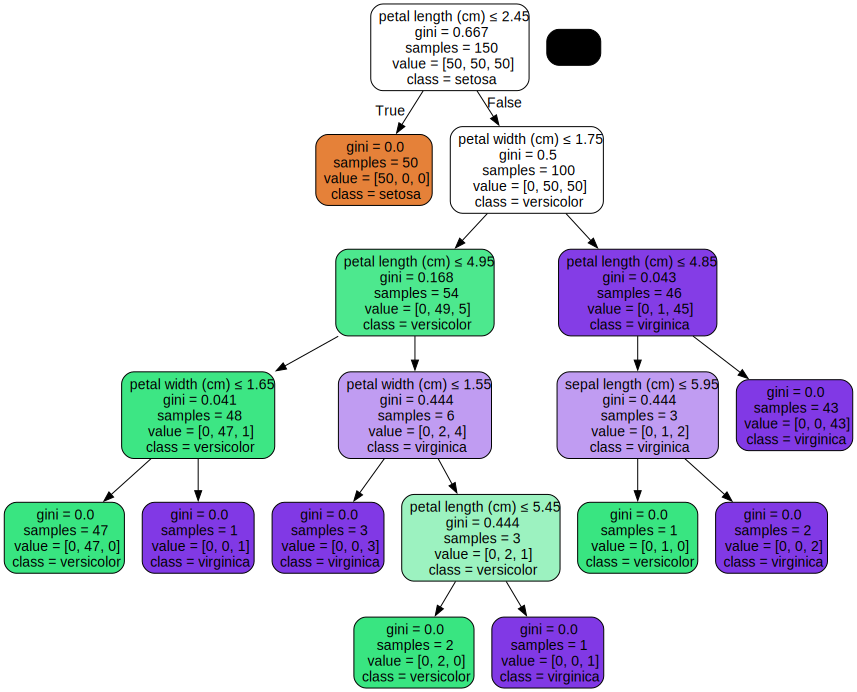

In [12]:
# Create DOT data
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, 
                filled=True, rounded=True, special_characters=True,
                feature_names=iris.feature_names,  # Use feature names from the dataset
                class_names=iris.target_names)    # Use class names from the dataset

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Create SVG with higher resolution and fixed size
svg = graph.create_svg()

SVG(svg)

### Gini Coefficient in Decision Trees
The Gini coefficient measures the impurity of a node. It ranges from 0 (pure) to 1 (maximum impurityn). The formula for the Gini coefficient is:

$$ G(S) = 1 - \sum_{i=1}^{c} p_i^2 $$

where:
- \( S \) is the dataset
- \( c \) is the number of classes
- \( p_i \) is the probability of an element being classified into a class \( i \)

### Entropy
Entropy is a measure of the randomness or disorder within a set of data. In the context of decision trees, entropy is used to quantify the impurity or uncertainty in a dataset. The formula for entropy \( H \) is:

$$ H(S) = -\sum_{i=1}^{c} p_i \log_2(p_i) $$

where:
- \( S \) is the dataset
- \( c \) is the number of classes
- \( p_i \) is the probability of an element being classified into a class \( i \)


### Picking the Root Node
When building a decision tree, the goal is to select the feature that best splits the data into subsets with the highest purity (lowest impurity). This is where entropy and the Gini coefficient come into play.

1. **Calculate Entropy for the Dataset**: Compute the entropy for the entire dataset to understand its overall impurity.
2. **Calculate Entropy for Each Feature**: For each feature, calculate the entropy for the subsets created by splitting the dataset based on that feature.
3. **Information Gain**: Calculate the information gain for each feature. Information gain is the reduction in entropy achieved by splitting the dataset based on a feature. It is given by:

$$ IG(S, A) = H(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} H(S_v) $$

where:
- \( A \) is the feature
- \( S_v \) is the subset of \( S \) for which feature \( A \) has value \( v \)

4. **Select the Feature with the Highest Information Gain**: The feature with the highest information gain is chosen as the root node because it provides the most significant reduction in impurity.

### Example: Iris Dataset
The Iris dataset consists of 150 samples from three species of Iris flowers (setosa, versicolor, and virginica). Each sample has four features: sepal length, sepal width, petal length, and petal width.

#### Algorithm Example
1. **Root Node**: Start with the entire dataset. Calculate the Gini coefficient or entropy for the root node.
2. **Splitting**: Choose the feature that results in the highest information gain (reduction in impurity). For example, let's say we split on "petal length".
3. **Child Nodes**: Calculate the Gini coefficient or entropy for the child nodes created by the split.
4. **Repeat**: Continue splitting until a stopping criterion is met (e.g., maximum depth, minimum samples per leaf, or no further information gain).

#### Calculation Example
Let's say we split the root node based on "petal length". We calculate the Gini coefficient for the root node and the child nodes:

- **Root Node**: 
  - Setosa: 50 samples
  - Versicolor: 50 samples
  - Virginica: 50 samples
  - \( Gini = 1 - (0.33^2 + 0.33^2 + 0.33^2) = 0.67 \)

- **Child Nodes** (after split on "petal length"):
  - Node 1 (petal length <= 2.5):
    - Setosa: 50 samples
    - \( Gini = 1 - (1^2 + 0^2 + 0^2) = 0 \)
  - Node 2 (petal length > 2.5):
    - Versicolor: 50 samples
    - Virginica: 50 samples
    - \( Gini = 1 - (0.5^2 + 0.5^2) = 0.5 \)

The split on "petal length" reduces the overall Gini coefficient, indicating a good split.
